In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\music.csv")
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [5]:
X = df.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [6]:
Y=df.genre
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [8]:
model= DecisionTreeClassifier()
model.fit(X, Y)
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [9]:
# predictions= model.predict([ [21,1], [22,0]])
# predictions

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [10]:
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)
# model.fit(X_train,Y_train)
# predictions=model.predict(X_test)

# score= accuracy_score(Y_test,predictions)
# score

0.75

In [11]:
joblib.dump(model,'music-recommender.joblib')

['music-recommender.joblib']

In [14]:
model=joblib.load('music-recommender.joblib')
predictions= model.predict([[25,0]])
predictions


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dance'], dtype=object)

In [18]:
tree.export_graphviz(model,out_file= 'music-recommeder.dot',
                    feature_names=['age','gender'],
                    class_names=sorted(Y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.786\nsamples = 14\nvalue = [2, 4, 3, 2, 3]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.74\nsamples = 10\nvalue = [2, 0, 3, 2, 3]\nclass = Dance'),
 Text(0.25, 0.375, 'age <= 26.0\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 3, 0, 0]\nclass = Dance'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.75, 0.375, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 2, 3]\nclass = Jazz'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]\nclass = HipHop'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0]\nclass = Classical')]

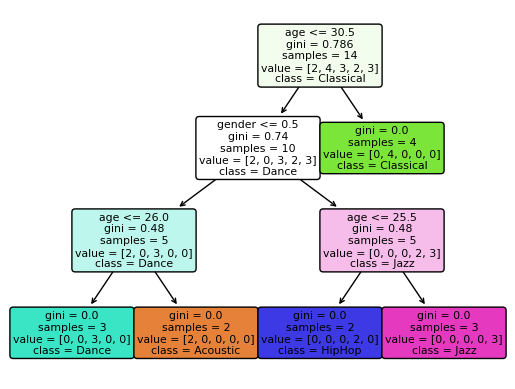

In [22]:
 tree.plot_tree(model, feature_names = ['age', 'gender'],
                    class_names = sorted(Y.unique()),
                     label='all',
                    rounded=True,
                    filled=True)
                    